<a href="https://colab.research.google.com/github/Priyesh29sri/Machine-Learning-/blob/main/ImageCompression_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

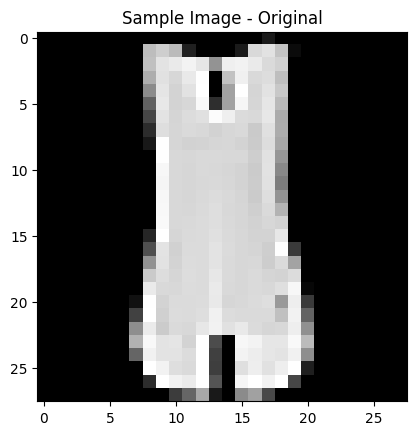

Compressed shape: (60000, 100)


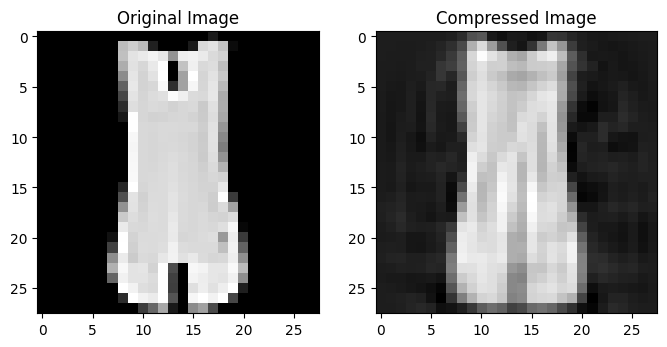

Compressed image saved at: /content/compressed_image.jpg


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
import imageio

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Display a sample image
plt.imshow(x_train[4], cmap='gray')
plt.title("Sample Image - Original")
plt.show()

# flattening each 28x28 images into a 1D vector of 748 pixels
x_train_flattened = x_train.reshape(-1, 28 * 28) / 255.0

#Apply PCA for Compression
n_components = 100
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_flattened)
print("Compressed shape:", x_train_pca.shape)

#Reconstruct the Images
x_train_reconstructed = pca.inverse_transform(x_train_pca)

# Display an original and a compressed image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_train[4], cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(x_train_reconstructed[4].reshape(28, 28), cmap='gray')
plt.title("Compressed Image")
plt.show()


compressed_image_path = '/content/compressed_image.jpg'
imageio.imwrite(compressed_image_path, (x_train_reconstructed[4].reshape(28, 28) * 255).astype(np.uint8))
print("Compressed image saved at:", compressed_image_path)
